#### Running the BE solver using Scipy's ivp_solve

In [1]:
import solver

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lin

In [2]:
x_span = (0.01,50)
y_span = (0.01,100)

y_steps = 70



scattering_data = solver.BE_solver(x_span,y_span,y_steps, interaction_strength=1,collisions="scattering")
annihilation_data = solver.BE_solver(x_span,y_span,y_steps, interaction_strength=1,collisions="annihilation")
both_data = solver.BE_solver(x_span,y_span,y_steps, interaction_strength=1,collisions="both")

In [3]:
xs_scattering = scattering_data[0]
fs_scattering = scattering_data[1]

xs_annihilation = annihilation_data[0]
fs_annihilation = annihilation_data[1]

xs_both = both_data[0]
fs_both = both_data[1]

ys = scattering_data[2]


print("Number of x-points for scattering =",len(xs_scattering))
print("Number of x-points for annihilation =",len(fs_annihilation[1]))
print("Number of x-points for both =",len(xs_both))
print(xs_scattering[28])
print(xs_annihilation[10])


Number of x-points for scattering = 102
Number of x-points for annihilation = 40
Number of x-points for both = 102
0.11902894996928037
0.11939154271081595


In [4]:
# distribution function for scattering, annihilation and both at x = 0.15
f_scattering = [fs_scattering[i][20] for i in range(len(ys))]
f_annihilation = [fs_annihilation[i][10] for i in range(len(ys))]
f_both = [fs_both[i][30] for i in range(len(ys))]


f_scattering_eq = [fs_scattering[i][0] for i in range(len(ys))]
f_scattering_20 = [fs_scattering[i][20] for i in range(len(ys))]
f_scattering_40 = [fs_scattering[i][40] for i in range(len(ys))]
f_scattering_60 = [fs_scattering[i][60] for i in range(len(ys))]

f_annihilation_eq = [fs_annihilation[i][0] for i in range(len(ys))]
f_annihilation_050 = [fs_annihilation[i][10] for i in range(len(ys))]
f_annihilation_100 = [fs_annihilation[i][15] for i in range(len(ys))]
f_annihilation_200 = [fs_annihilation[i][18] for i in range(len(ys))]

f_both_eq = [fs_both[i][0] for i in range(len(ys))]
f_both_20 = [fs_both[i][20] for i in range(len(ys))]
f_both_40 = [fs_both[i][40] for i in range(len(ys))]
f_both_60 = [fs_both[i][60] for i in range(len(ys))]

Text(0, 0.5, 'f(y,x)')

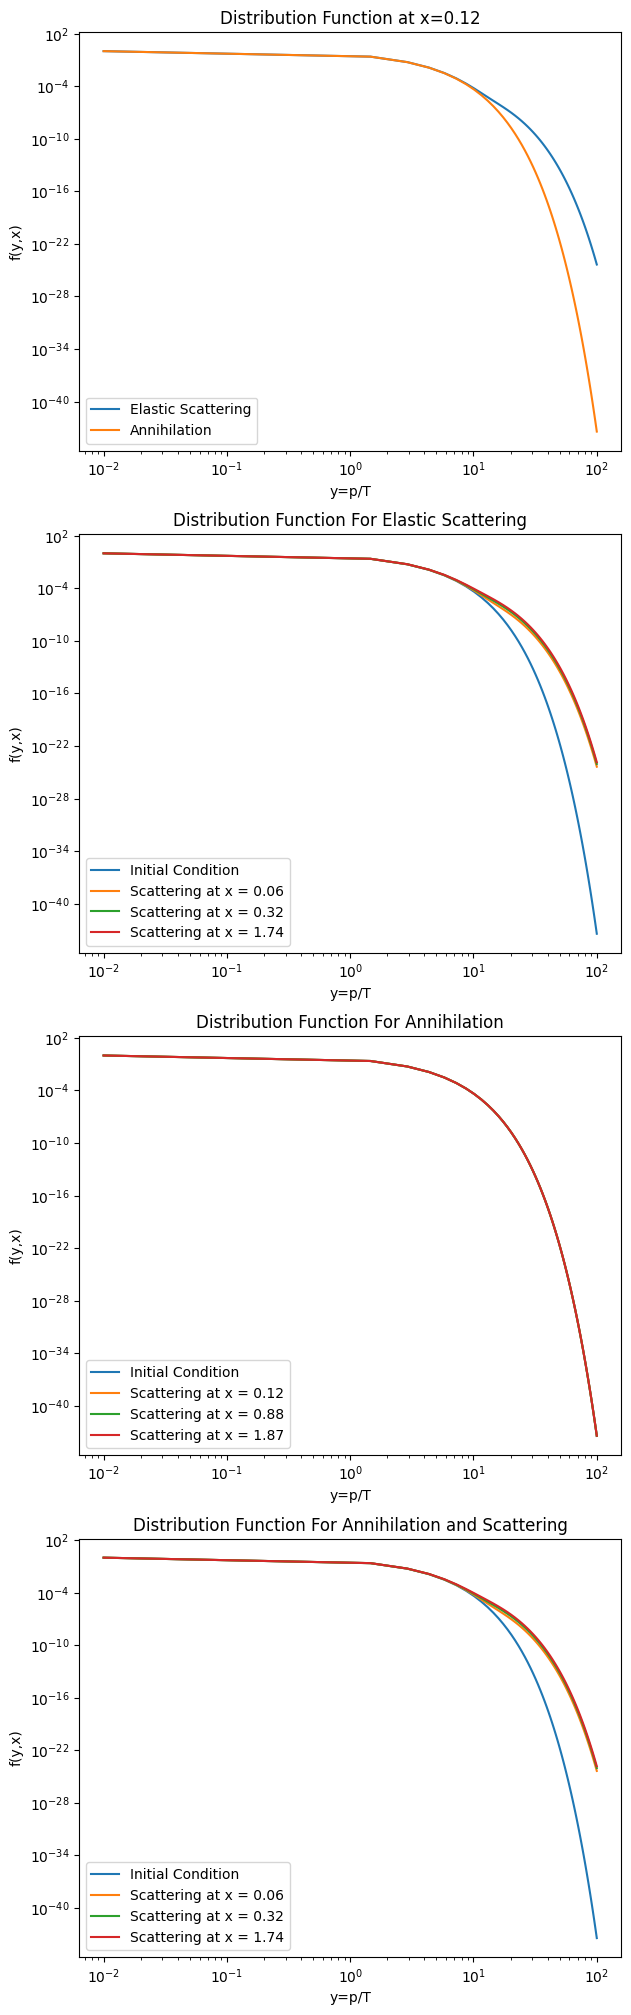

In [5]:
fig, axs = plt.subplots(4,figsize=(7,25))

axs[0].loglog(ys,f_scattering, label = "Elastic Scattering")
axs[0].loglog(ys,f_annihilation, label = "Annihilation")
# axs[0].loglog(ys,f_both, label = "Elastic Scattering + Annihilation")

axs[0].legend()
axs[0].set_title(f"Distribution Function at x={xs_scattering[28]:.02f}")
axs[0].set_xlabel("y=p/T")
axs[0].set_ylabel("f(y,x)")


axs[1].loglog(ys,f_scattering_eq, label = "Initial Condition")
axs[1].loglog(ys,f_scattering_20, label = f"Scattering at x = {xs_scattering[20]:.02f}")
axs[1].loglog(ys,f_scattering_40, label = f"Scattering at x = {xs_scattering[40]:.02f}")
axs[1].loglog(ys,f_scattering_60, label = f"Scattering at x = {xs_scattering[60]:.02f}")

axs[1].legend()
axs[1].set_title(f"Distribution Function For Elastic Scattering")
axs[1].set_xlabel("y=p/T")
axs[1].set_ylabel("f(y,x)")


axs[2].loglog(ys,f_annihilation_eq, label = "Initial Condition")
axs[2].loglog(ys,f_annihilation_050, label = f"Scattering at x = {xs_annihilation[10]:.02f}")
axs[2].loglog(ys,f_annihilation_100, label = f"Scattering at x = {xs_annihilation[15]:.02f}")
axs[2].loglog(ys,f_annihilation_200, label = f"Scattering at x = {xs_annihilation[18]:.02f}")

axs[2].legend()
axs[2].set_title(f"Distribution Function For Annihilation")
axs[2].set_xlabel("y=p/T")
axs[2].set_ylabel("f(y,x)")


axs[3].loglog(ys,f_both_eq, label = "Initial Condition")
axs[3].loglog(ys,f_both_20, label = f"Scattering at x = {xs_both[20]:.02f}")
axs[3].loglog(ys,f_both_40, label = f"Scattering at x = {xs_both[40]:.02f}")
axs[3].loglog(ys,f_both_60, label = f"Scattering at x = {xs_both[60]:.02f}")

axs[3].legend()
axs[3].set_title(f"Distribution Function For Annihilation and Scattering")
axs[3].set_xlabel("y=p/T")
axs[3].set_ylabel("f(y,x)")

In [11]:
def random_distribution(y,x):
    return 0.5

x_span = (0.01,50)
y_span = (0.01,100)
y_steps = 400
sol = solver.BE_solver(x_span,y_span,y_steps,1,collisions="scattering",initial_condition=random_distribution)
print(len(sol[0]))

39


In [13]:
xs = sol[0]
fs = sol[1]
ys = sol[2]

# get distribution function values at different times
f_0 = [fs[k][0] for k in range(len(ys))]
f_1 = [fs[k][10] for k in range(len(ys))]
f_2 = [fs[k][15] for k in range(len(ys))]
f_3 = [fs[k][20] for k in range(len(ys))]
f_4 = [fs[k][25] for k in range(len(ys))]
f_5 = [fs[k][30] for k in range(len(ys))]
f_6 = [fs[k][-1] for k in range(len(ys))]

# compute the y-values for the plots
x = ys
y_0 = [yi * yi * f_0[i] for i,yi in enumerate(ys)]
y_1 = [yi * yi * f_1[i] for i,yi in enumerate(ys)]
y_2 = [yi * yi * f_2[i] for i,yi in enumerate(ys)]
y_3 = [yi * yi * f_3[i] for i,yi in enumerate(ys)]
y_4 = [yi * yi * f_4[i] for i,yi in enumerate(ys)]
y_5 = [yi * yi * f_5[i] for i,yi in enumerate(ys)]
y_6 = [yi * yi * f_6[i] for i,yi in enumerate(ys)]

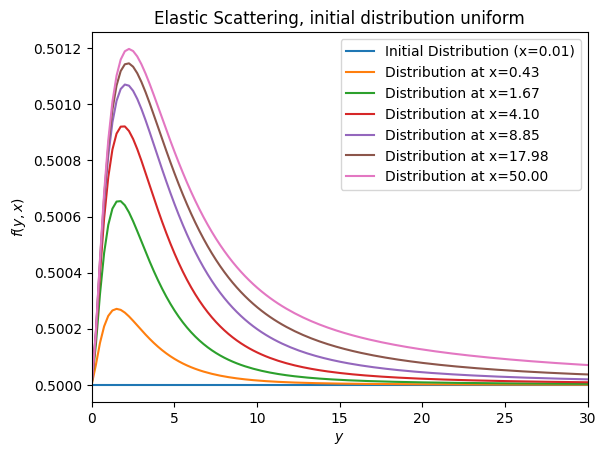

In [14]:
plt.plot(x,f_0,label=f"Initial Distribution (x={xs[0]:.02f})")
plt.plot(x,f_1,label=f"Distribution at x={xs[10]:.02f}")
plt.plot(x,f_2,label=f"Distribution at x={xs[15]:.02f}")
plt.plot(x,f_3,label=f"Distribution at x={xs[20]:.02f}")
plt.plot(x,f_4,label=f"Distribution at x={xs[25]:.02f}")
plt.plot(x,f_5,label=f"Distribution at x={xs[30]:.02f}")
plt.plot(x,f_6,label=f"Distribution at x={xs[-1]:.02f}")

# plt.plot(x,MB_distribution(x,0),label = "MB distribution")

plt.xlim(0,30)
plt.xlabel(r"$y$")
plt.ylabel(r"$f(y,x)$")
plt.title("Elastic Scattering, initial distribution uniform")
plt.legend()

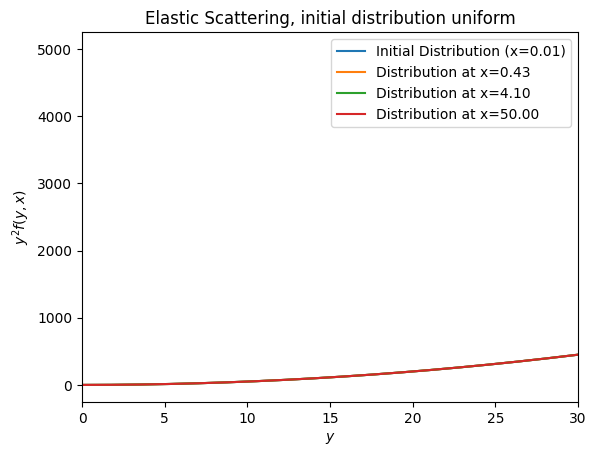

In [20]:
y_0 = [yi * yi * f_0[i] for i,yi in enumerate(ys)]
y_1 = [yi *yi * f_1[i] for i,yi in enumerate(ys)]
y_2 = [yi * yi * f_2[i] for i,yi in enumerate(ys)]
y_3 = [yi * yi * f_3[i] for i,yi in enumerate(ys)]
y_4 = [yi * yi * f_4[i] for i,yi in enumerate(ys)]
y_5 = [yi * yi * f_5[i] for i,yi in enumerate(ys)]
y_6 = [yi * yi * f_6[i] for i,yi in enumerate(ys)]

plt.plot(x,y_0,label=f"Initial Distribution (x={xs[0]:.02f})")
#plt.plot(x,y_1,label=f"Distribution at x={xs[5]:.02f}")
plt.plot(x,y_2,label=f"Distribution at x={xs[10]:.02f}")
#plt.plot(x,y_3,label=f"Distribution at x={xs[15]:.02f}")
plt.plot(x,y_4,label=f"Distribution at x={xs[20]:.02f}")
#plt.plot(x,y_5,label=f"Distribution at x={xs[25]:.02f}")
plt.plot(x,y_6,label=f"Distribution at x={xs[-1]:.02f}")

plt.xlim(0,30)
plt.xlabel(r"$y$")
plt.ylabel(r"$y^2f(y,x)$")
plt.title("Elastic Scattering, initial distribution uniform")
plt.legend()